#Task 1: Linear Filter
You are required to implement the Smoothing Operation with Average Filter (Box & Weighted Average filters). Both filters can contain user defined parameters to obtain different levels of blurring effects, which is the size of the filter in this case. Complete the following two functions

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.color
import skimage.filters
from scipy import signal
import random
import colorsys
from google.colab.patches import cv2_imshow

In [2]:
def apply_convolution(image, kernel):
    h, w = image.shape[:2]
    kh, kw = kernel.shape[:2]
    pad_h, pad_w = kh // 2, kw // 2
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w), (0, 0)), mode='constant')

    result = np.zeros_like(image)
    for i in range(h):
        for j in range(w):
            for k in range(image.shape[2]):
                region = padded_image[i:i+kh, j:j+kw, k]
                result[i, j, k] = np.sum(region * kernel)

    return result

In [3]:
def boxFilter(image, size):
  #implement this function
  kernel = np.ones((size, size)) / (size * size)
  return apply_convolution(image, kernel)

def weightedFilter(image, size):
  #implement this function
    x, y = np.mgrid[-size//2:size//2+1, -size//2:size//2+1]
    sigma = 1.0
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2)) #Nornaml distribution
    kernel /= kernel.sum()

    blur_image = apply_convolution(image, kernel)

    return blur_image.astype(np.uint8)



# Task 1: Output and Analysis
For this task, use an appropriate color image from Chapter 06.zip. Use your previously implemented functions to show the outputs of the two averaging filters on the sample image in both RGB and HSV color spaces. Provide your analysis on the following topics:
<ol>
<li> Explain how the parameters affect the increase or decrease of the blurring effect. </li>

<li> Do we require intensity scaling after applying averaging filters? </li>

<li> Is there any differences observed between the results of RGB and HSV color spaces? </li>
</ol>

**Blurring Effect Based on Filter Parameters :**
The blurring effect depends on the size of the kernel (filter) used:

1.   Smaller kernels (e.g., 3x3, 5x5): A smaller filter will result in slight smoothing, keeping most of the image’s details intact.
2. Larger kernels (e.g., 15x15, 25x25): As the kernel size increases, the blurring effect becomes stronger, leading to more significant loss of detail and a much smoother appearance across the image.
A larger kernel averages pixel values over a larger neighborhood, making the blurring more noticeable. Conversely, a smaller kernel keeps the local contrast higher, with more preserved details.


\\
**Intensity Scaling After Averaging Filters :**

Intensity scaling is typically not required after applying an averaging filter because the resulting pixel values are already normalized within the valid range (0–255 for 8-bit images). The averaging filter operates by taking the mean of surrounding pixel values, which will inherently stay within the acceptable range. Thus, the output will generally maintain the appropriate brightness and contrast without additional scaling.

However, scaling might be needed if additional processing or custom filters push pixel values beyond the normal range, but this is rare for standard averaging filters.

\\
**Differences Between RGB and HSV Color Spaces**


*  **RGB Color Space:**In the RGB space, the filter operates on the three channels (Red, Green, and Blue) independently.The blurring affects all channels equally, meaning that color and brightness are both blurred simultaneously.
*   **HSV Color Space:** In the HSV space, applying the filter only on the V (Value) channel targets the intensity (brightness) alone, leaving the color (Hue and Saturation) unchanged.
This can produce more natural results, as only the brightness is affected, preserving color fidelity.



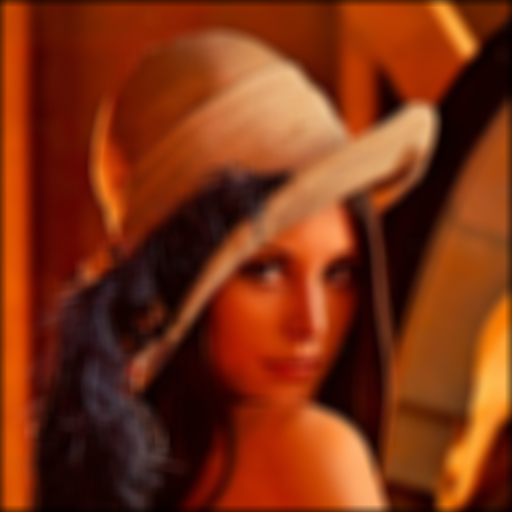

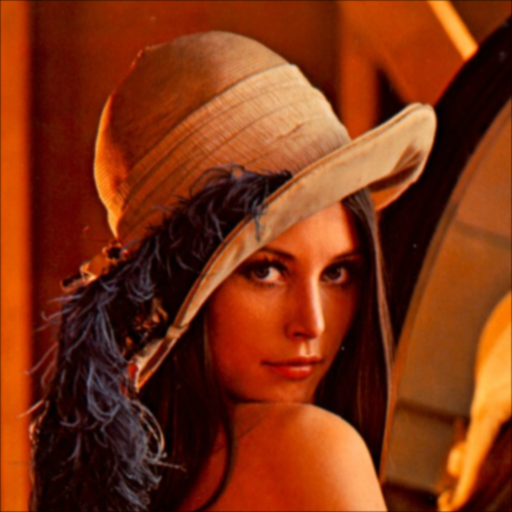

In [5]:
# Generate outputs for Task 1 here
image_path = "noise.tif"
image = cv2.imread(image_path, cv2.IMREAD_COLOR )
image = cv2.resize(image, (512, 512))
box_filtered= boxFilter(image, 15)
cv2_imshow(box_filtered)
weightedAvg_filtered=weightedFilter(image, 5)
cv2_imshow(weightedAvg_filtered)


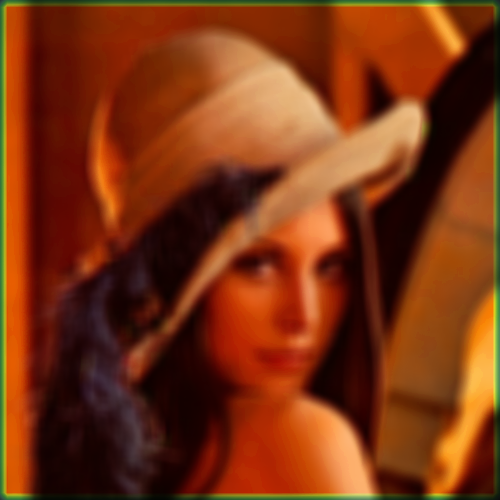

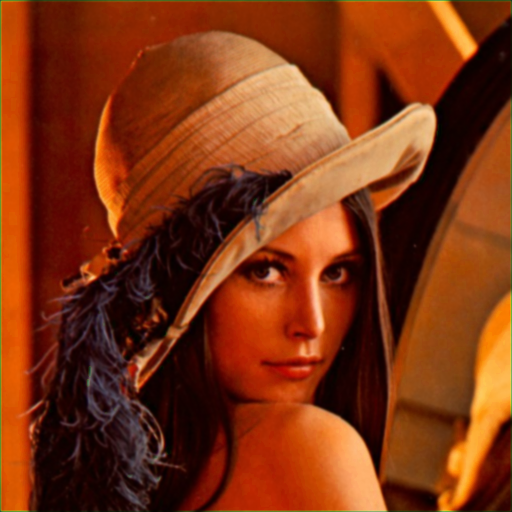

In [6]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
h_channel, s_channel, v_channel = cv2.split(image_hsv)
box_filtered2= boxFilter(image_hsv, 15)
box_filtered2 = cv2.resize(box_filtered2, (500, 500))
image2= cv2.cvtColor(box_filtered2, cv2.COLOR_HSV2RGB)
cv2_imshow(image2)
#########
weightedAvg_filtered2=weightedFilter(image_hsv, 5)
weightedAvg_filtered2 = cv2.resize(weightedAvg_filtered2, (512, 512))
image3= cv2.cvtColor(weightedAvg_filtered2, cv2.COLOR_HSV2RGB)
cv2_imshow(image3)
image3 = cv2.resize(image3, (512, 512))

##Analysis:
[Write your analysis here]

# Task 2
For this task, you are required to write a function designed to artificially add Salt & Pepper noise to a given image. The function should contain a parameter called noise_level (value between 0 and 1) that determines the percentage of pixels that will be affected by Salt & Pepper noise.

Also, write three separate functions to implement the Median Filter, Min Filter, and Max Filter.

In [7]:
def salt_and_pepper(image, noise_level):
    noisy_image = np.copy(image)
    total_pixels = image.shape[0] * image.shape[1]
    num_salt = int(np.ceil(noise_level * total_pixels * 0.5))
    num_pepper = int(np.ceil(noise_level * total_pixels * 0.5))

    # Add Salt noise
    coords = [np.random.randint(0, i, num_salt) for i in image.shape[:2]]
    noisy_image[coords[0], coords[1], :] = 255

    # Add Pepper noise
    coords = [np.random.randint(0, i, num_pepper) for i in image.shape[:2]]
    noisy_image[coords[0], coords[1], :] = 0

    return noisy_image

In [8]:
def medianFilter(image, kernel_size):
    # Ensure kernel size is odd
    if kernel_size % 2 == 0:
        kernel_size += 1
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='edge')  # Pad the image
    filtered_image = np.zeros_like(image)
    for i in range(filtered_image.shape[0]):
        for j in range(filtered_image.shape[1]):
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            filtered_image[i, j] = np.median(region)

    return filtered_image

In [9]:
def minFilter(image, kernel_size):
    if kernel_size % 2 == 0:
        kernel_size += 1

    pad_size = kernel_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='edge')  # Pad the image
    filtered_image = np.zeros_like(image)

    # Perform the min filter operation
    for i in range(filtered_image.shape[0]):
        for j in range(filtered_image.shape[1]):
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            filtered_image[i, j] = np.min(region)

    return filtered_image

In [10]:
def maxFilter(noisy_image, kernel_size):
    if kernel_size % 2 == 0:
        kernel_size += 1

    pad_size = kernel_size // 2
    padded_image = np.pad(noisy_image, ((pad_size, pad_size), (pad_size, pad_size)), mode='edge')  # Pad the image
    filtered_image = np.zeros_like(noisy_image)

    # Perform the max filter operation
    for i in range(filtered_image.shape[0]):
        for j in range(filtered_image.shape[1]):
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            filtered_image[i, j] = np.max(region)

    return filtered_image

# Task 2: Output and Analysis
Use your previously implemented functions to show the addition of salt & pepper noise to a sample image, as well as how your implemented filters can remove the noise.

Show the results for both RGB and HSV color spaces.

Provide your analysis on the following topic:
<ol>
<li> What happens when the noise level increases for a particular filter size? </li>

<li> How does filter size affect the noise reduction? </li>

<li> Is there any differences observed between the results of RGB and HSV color spaces? </li>
</ol>

Here's the formatted text you can copy directly into your Colab notebook text cells:

---

**Salt & Pepper Noise and Filter Effects:**

When **Salt and Pepper noise** is added to an image, random pixels turn either **black (0)** or **white (255)**. This type of noise is typically removed using **median**, **min**, and **max** filters.

---

### **Median Filter:**
- **Effectiveness**: Replaces each pixel with the **median value** of its neighborhood, removing noise while preserving details.
- **Noise Level**: For high noise, **larger filters** (like 5x5) are needed but may blur details.

---

### **Min Filter:**
- **Effectiveness**: Removes **salt noise** (white pixels) by replacing with the **minimum value** from the neighborhood.
- **Noise Level**: Larger filters remove more noise but can overly **darken** the image.

---

### **Max Filter:**
- **Effectiveness**: Removes **pepper noise** (black pixels) by replacing with the **maximum value**.
- **Noise Level**: Larger filters reduce more noise but can cause **over-brightening**.

---

### **Analysis**

1. **Noise Level and Filter Performance:**
   - As **noise increases**, small filters (3x3) may not fully remove noise, while larger filters (5x5, 7x7) handle higher noise levels but can cause blurring.

2. **Filter Size and Noise Reduction:**
   - **Smaller filters** preserve details but are less effective for higher noise.
   - **Larger filters** remove more noise but result in **blurred details**.

3. **RGB vs. HSV Color Spaces:**
   - **RGB Space**: Filtering each channel separately can lead to **color shifts**.
   - **HSV Space**: Filtering the **V (Value)** channel preserves **hue** and **saturation**, keeping colors more intact.

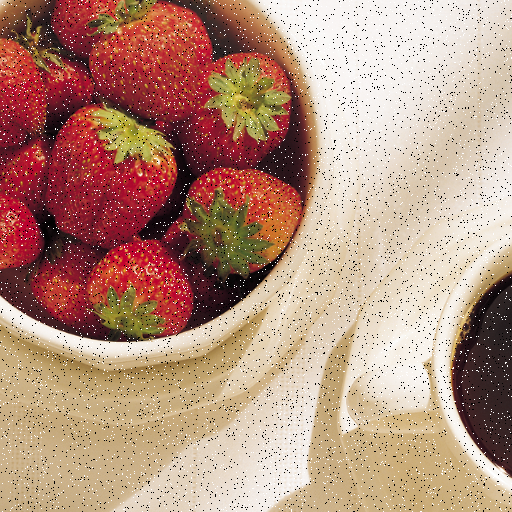

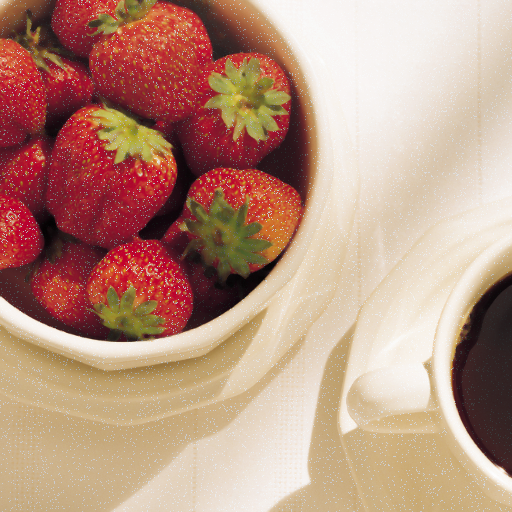

In [12]:
#Generate output for Task 2 here
img = cv2.imread("strawberry.tif", cv2.IMREAD_COLOR)
img = cv2.resize(img, (512, 512))
noisy_image = salt_and_pepper(img, 0.05)
cv2_imshow(noisy_image)

##########
hsv_img = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2HSV)
h_channel, s_channel, v_channel = cv2.split(hsv_img)
# Apply the median filter on the V channel
filtered_v_channel = medianFilter(v_channel, 5)
filtered_hsv = cv2.merge([h_channel, s_channel, filtered_v_channel])
filtered_image = cv2.cvtColor(filtered_hsv, cv2.COLOR_HSV2BGR)
cv2_imshow(filtered_image)

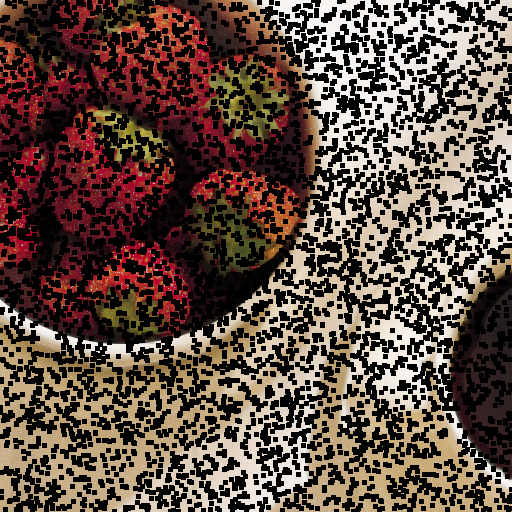

In [13]:
hsv_img = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2HSV)
h_channel, s_channel, v_channel = cv2.split(hsv_img)
filtered_v_channel = minFilter(v_channel, 5)
filtered_hsv = cv2.merge([h_channel, s_channel, filtered_v_channel])
filtered_image = cv2.cvtColor(filtered_hsv, cv2.COLOR_HSV2BGR)
cv2_imshow(filtered_image)

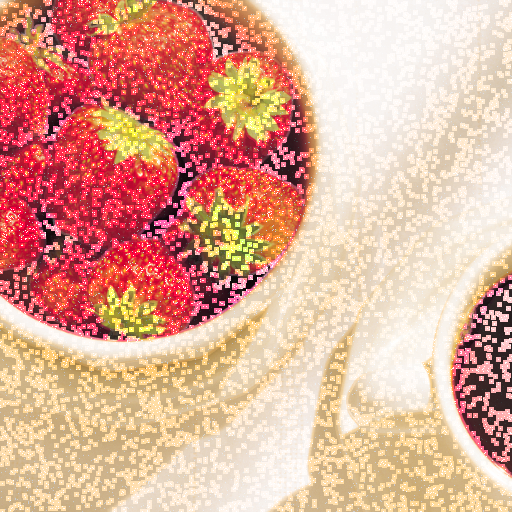

In [14]:
hsv_img = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2HSV)
h_channel, s_channel, v_channel = cv2.split(hsv_img)
filtered_v_channel = maxFilter(v_channel, 5)
filtered_hsv = cv2.merge([h_channel, s_channel, filtered_v_channel])
filtered_image = cv2.cvtColor(filtered_hsv, cv2.COLOR_HSV2BGR)
cv2_imshow(filtered_image)

## Analysis:
[Write your analysis here]

# Task 3

For this task, you are required to design a Laplacian filter that will be used to compute edge responses. The function will return the edge response as an image, which will be called inside the sharpen function to generate a sharpened version of an image. The sharpen function contains a user defined parameter that can be used to control the level of sharpening.


In [18]:
def laplacian(image):
    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    laplacian_kernel = np.array([[0, 1, 0],
                                 [1, -4, 1],
                                 [0, 1, 0]])

    edge_response = cv2.filter2D(gray_image, -1, laplacian_kernel)

    return edge_response

def sharpen(image, sharpen_level):
    if sharpen_level < 0:
        raise ValueError("Sharpen level must be non-negative.")

    edge_response = laplacian(image)
    edge_response = cv2.normalize(edge_response, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    edge_response_3channel = cv2.cvtColor(edge_response, cv2.COLOR_GRAY2BGR)
    sharp_image = cv2.addWeighted(image, 1 + sharpen_level, edge_response_3channel, sharpen_level, 0)

    return sharp_image

# Task 3: Output and Analysis
Use your previously implemented laplacian function to show the edge response of a sample image. use an appropriate color image from Chapter 06.zip for this task. Next, show the sharpened image after using the sharpen function.

Show the results for both RGB and HSV color spaces.

Provide your analysis on the following topic:
<ol>
<li> Why do we require intensity scaling after computing the sharpening? </li>
<li> How does the value of sharpen_level affect the sharpening? </li>
<li> Is there any differences observed between the results of RGB and HSV color spaces? </li>

</ol>

### **Intensity Scaling After Computing Sharpening:**
- **Why it's required**: After applying sharpening, the pixel values might fall outside the valid intensity range (0-255). Intensity scaling is necessary to bring the sharpened pixel values back within this range. Without scaling, pixel values that exceed 255 become **clipped** and details may be lost, leading to unnatural-looking images.
  
---

### **Effect of Sharpen Level:**
- **Sharpening intensity**: The **sharpen_level** determines how much of the **edge response** is added back to the original image.
   - **Low sharpen_level** (<1) results in subtle sharpening, enhancing edges slightly.
   - **Higher sharpen_level** (>1) increases the emphasis on edges, making them more pronounced. However, too high a value can introduce artifacts, making the image appear unnatural.

---

### **Differences Between RGB and HSV Color Spaces:**
- **RGB Space**: Sharpening in **RGB** can affect all channels equally, which may alter the color balance, especially if one channel gets more sharpened than others.
  
- **HSV Space**: Sharpening in the **V (Value)** channel of HSV preserves **hue** and **saturation**, focusing only on the intensity (brightness). This tends to maintain the overall color structure while enhancing edge contrast, often yielding more **natural-looking results**.

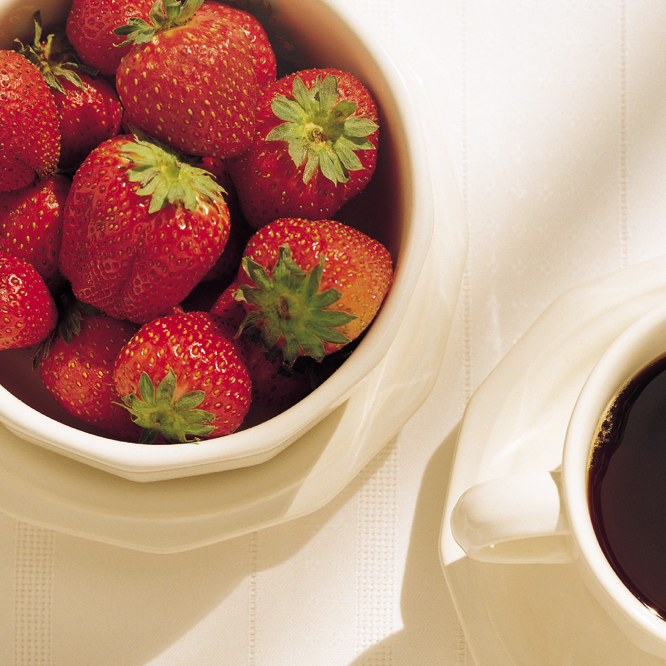

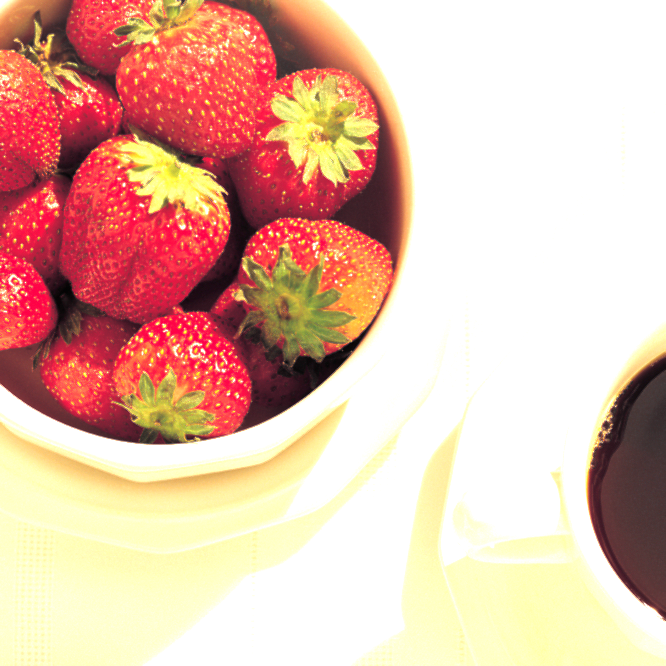

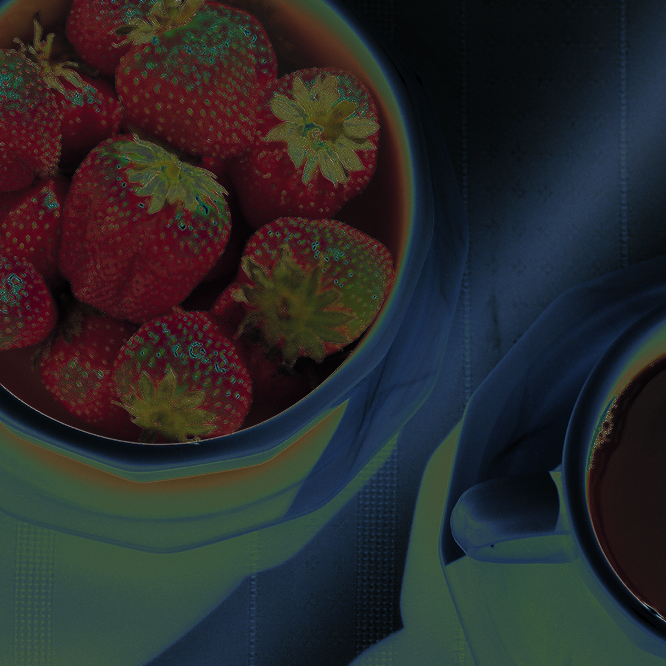

In [29]:
#Generate output for Task 3 here

image = cv2.imread('strawberry.tif')
sharpened_image = sharpen(image, sharpen_level=0.5)
cv2_imshow(image)
cv2_imshow( sharpened_image)
#difference
cv2_imshow( sharpened_image-image)

## Analysis:
In the analysis of the image sharpening process using a Laplacian filter:

- **Original Image**: The initial image appears natural, with a standard level of contrast between the strawberries and their background.

- **Sharpened Image**: After applying the **Laplacian-based sharpening** with a sharpen level of `0.5`, the edges of the strawberries and other objects will become more defined. The **edges will have stronger contrast**, making the details, such as the texture of the strawberry seeds and the highlights on the leaves, stand out more clearly.

- **Difference Image**: The difference between the sharpened and original images, shown as `sharpened_image - image`, will highlight the regions where significant changes have occurred. This mainly involves the **edges**, where the sharpening enhances the contrast. You will see bright pixels (indicating an increase in intensity) around the edges of the strawberries and dark regions where the intensity may have been reduced slightly.

In summary, the image will become crisper, with more prominent edge details. The sharpen_level being moderate (0.5) will prevent the image from looking overly processed while still making noticeable enhancements.

# Task 4

For this task, you are required to design a function that takes two parameters: an image and a value $k$. The function should perform Unsharp masking ($k=1$) and High-boost filtering ($k>1$) and return a filtered image.

In [26]:
def high_boost_filter(image, k):
    image = np.float32(image)
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    mask = image - blurred
    high_boost_image = image + k * mask
    high_boost_image = np.clip(high_boost_image, 0, 255).astype(np.uint8)
    return high_boost_image

# Function to apply the filtering in HSI color space
def apply_in_HSI(image, k):
    hsi_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h_channel, s_channel, i_channel = cv2.split(hsi_image)
    filtered_i_channel = high_boost_filter(i_channel, k)

    filtered_hsi = cv2.merge([h_channel, s_channel, filtered_i_channel])
    filtered_rgb = cv2.cvtColor(filtered_hsi, cv2.COLOR_HSV2BGR)

    return filtered_rgb

# Task 4: Output and Analysis
Use your previously implemented high_boost_filter function to show the output of Unsharp Masking and High-boost filtering on an RGB image. Next, show both outputs for the HSI color space.

Provide your analysis on the following topic:
<ol>
<li> Is there any difference in applying unsharp masking or high-boost filtering for RGB and HSI color space? </li>
<li> What happens if $k<1$? </li>
</ol>

### **Unsharp Masking vs. High-Boost Filtering:**
- **Concept**: Both unsharp masking (USM) and high-boost filtering (HBF) enhance image sharpness by emphasizing edges, but they use different methods and impact color spaces differently.

---

### **RGB Color Space:**
- **Channel Impact**: USM and HBF affect all three RGB channels equally, which can alter color balance and introduce artifacts, especially if one channel is sharpened more than others.
  
- **Edge Definition**: While both methods improve edge clarity, they can also amplify noise, resulting in unnatural effects if not carefully controlled.

---

### **HSI Color Space:**
- **Intensity Focus**: In HSI, sharpening is primarily applied to the **Intensity (I)** channel, preserving hue and saturation. This approach yields more natural enhancements by maintaining overall color integrity.

- **Natural Results**: By focusing on intensity, both methods minimize unwanted color shifts and artifacts common in RGB processing.

---

### **Scaling Factor \( k \):**
- **Effect of \( k \)**:
  - **\( k < 1\)**: Reduces the sharpening effect, enhancing details subtly but potentially softening the image.
  - **\( k = 1\)**: Provides balanced sharpening, preserving detail without excessive artifacts.
  - **\( k > 1\)**: Increases edge emphasis, but too high a value can create unnatural artifacts.


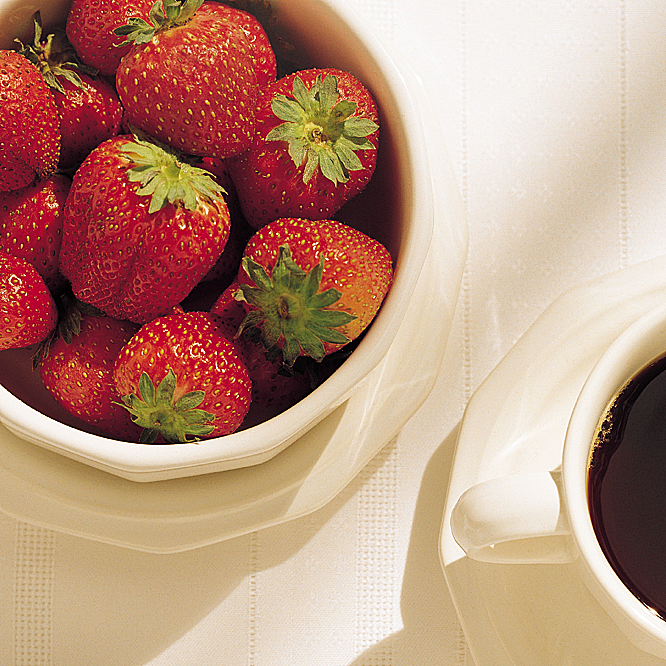

In [28]:
# Apply Unsharp Masking (k=1) and High-Boost Filtering (k>1) for RGB
unsharp_image_rgb = high_boost_filter(image, 1)
high_boost_image_rgb = high_boost_filter(image, 1.5)

# Apply Unsharp Masking (k=1) and High-Boost Filtering (k>1) for HSI
unsharp_image_hsi = apply_in_HSI(image, 1)
high_boost_image_hsi = apply_in_HSI(image, 1.5)

# Display the results
# cv2_imshow(image)
# cv2_imshow(unsharp_image_rgb)
cv2_imshow(high_boost_image_rgb)